In [1]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['CODE_ROOT'])

In [3]:
import pubplot

from   vmaxer        import vmaxer
from   astropy.table import Table
from   smith_kcorr   import test_plots, test_nonnative_plots
from   cosmo         import distmod
from   findfile      import findfile

In [4]:
dryrun  = False
version = 'GAMA4'
survey  = 'gama'

##  kE Catalog

In [5]:
fpath   = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
kE = Table.read(fpath)
kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
70716,587722983351189586,181.111327,0.02591698,17.056189,0.09375,5,322124504883030016,6,18.740107,17.54515,17.01728,16.723217,16.588306,0.09375,301.86241753728314,37.399045229372135,G12,0,0,-275.93655364415196,-5.352823665520101,0.1248397028334723,275.97176757963723,3.034860281503729,-0.15187231461395295,0.5278702,17.056189,0.5355784995082024,0,4,-0.10725893146982315,-0.11496725275536915,0.09803169398089073,0.12691577239808247,0.4989860998054645,2.12,-0.0909375,-0.19874999,-20.34995083729679,-20.242138350707837,-20.440888339979,37.40613942067082,37.49707692335303,37.298326934081864,-0.10836148848706266,-0.11659569422894375,0.10836338987513845,0.14857959548471952,-20.36028253319104
85914,587722983889502862,184.471363,0.46391111,19.646067,0.19949,4,G12_Y1_ND7_237,5,22.369371,20.425621,19.648653,19.433435,19.248766,0.19949,689.203242441243,39.19173655986245,G12,0,0,-572.8126999319147,-44.79327768781844,4.652196965978327,573.1731174235508,39.980262824355165,4.077488612136789,0.776968,19.646067,0.5893779561172953,0,4,-0.04937141717318191,0.13821862902885884,0.1650432501466949,0.3986878791608998,0.543323373305131,2.12,-0.1935053,-0.42291877,-19.51720784228816,-19.287794377622745,-19.71071314435973,39.16327450793757,39.356779810009144,38.93386104327216,-0.04529855351745282,0.14342692862166717,0.1714263248447483,0.40860221833533045,-19.523590916986212
216998,587725075529597355,140.76795925,0.60773345,18.812159,0.13864,4,G09_Y1_IN2_054,6,20.516468,19.2863,18.738443,18.440714,18.257284,0.13864,460.50611851121505,38.316177024108484,G9,0,0,-313.25421619611996,255.77573728984112,4.289743409740991,311.0988796911096,-258.3979444864456,3.977812143006298,0.5478573,18.812159,0.49021721362325743,0,3,-0.08989149818837769,-0.032251427265736696,0.10770614488408378,0.19396052762204985,0.4616029018079324,2.12,-0.1344808,-0.2939168,-19.4772437801929,-19.317807792720366,-19.61172458439784,38.28940236478763,38.42388316899257,38.12996637731509,-0.07748106367248281,-0.015232620351032525,0.1392438146897183,0.24994266936263076,-19.508781449998533
78173,587722983366394432,215.85410604,0.17438285,18.324614,0.14051,4,G15_Y1_DS1_257,6,21.086313,19.305008,18.371477,17.94422,17.736616,0.14051,467.30395504069276,38.3479972835196,G15,0,0,-332.0911560665643,-239.98874834337158,1.2470413135261753,334.09634809450563,237.19082768304722,0.9120493566255404,0.9335308,18.324614,0.8396761575689096,0,5,-0.05637683839500815,0.037477811531199556,0.17178028961051786,0.3899573015116694,0.7153537955939656,0.8,-0.1362947,-0.112408,-20.058869309208376,-20.082756004712564,-20.19516400196312,38.38348288037537,38.51977757313011,38.40736957587956,-0.07637206210534624,-0.010676904107215987,0.14035281625685486,0.2544983856064473,-20.027441835854713
7612,588848900985717040,178.39016426,0.73288583,19.600956,0.22688,4,G12_Y2_014_115,5,21.286945,20.42685,19.56998,19.17657,18.900967,0.22688,797.0425033309415,39.5074074066663,G12,0,0,-649.3404146325531,18.24927730022673

In [6]:
def color_plot(ctype, xlabel=None, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    if xlabel == None:
        xlabel = ctype
    
    for count, jj in enumerate(np.unique(idx)):
        sample  = kE[(idx == jj) & (kE['MCOLOR_0P0'].data >= -23.) & (kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.05
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample, lw=2, color=colors[count], label=r'{:.0f} $\leq M_r \leq$ {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)

    plt.xlabel(xlabel)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    
    plt.xlim(-0.1, max_col)
    
    plt.legend(frameon=False)

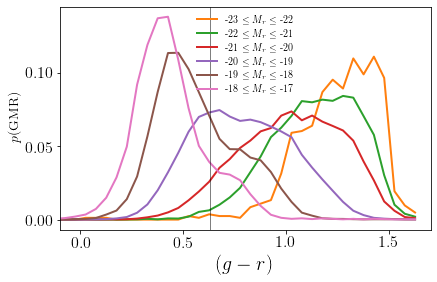

In [7]:
color_plot('GMR', '$(g-r)$', max_col=1.7)

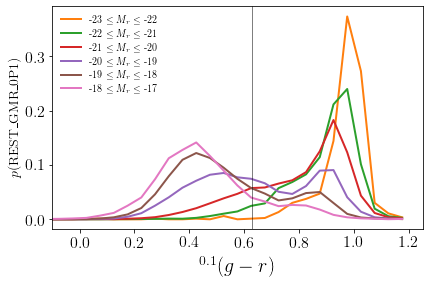

In [8]:
color_plot('REST_GMR_0P1', '$^{0.1}(g-r)$', max_col=1.25)

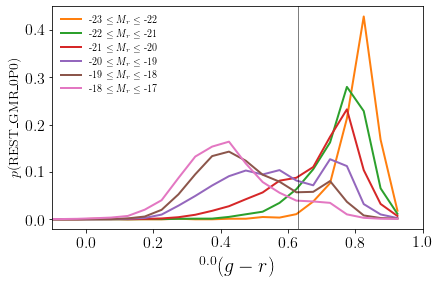

In [9]:
color_plot('REST_GMR_0P0', '$^{0.0}(g-r)$')

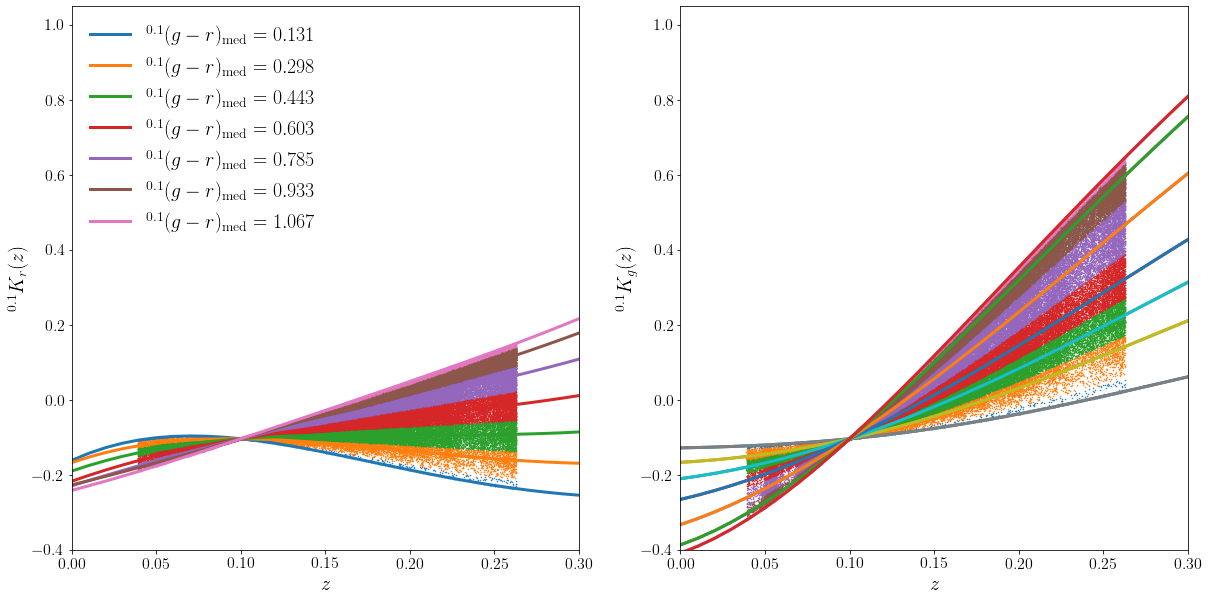

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)
axes[1].get_legend().remove()

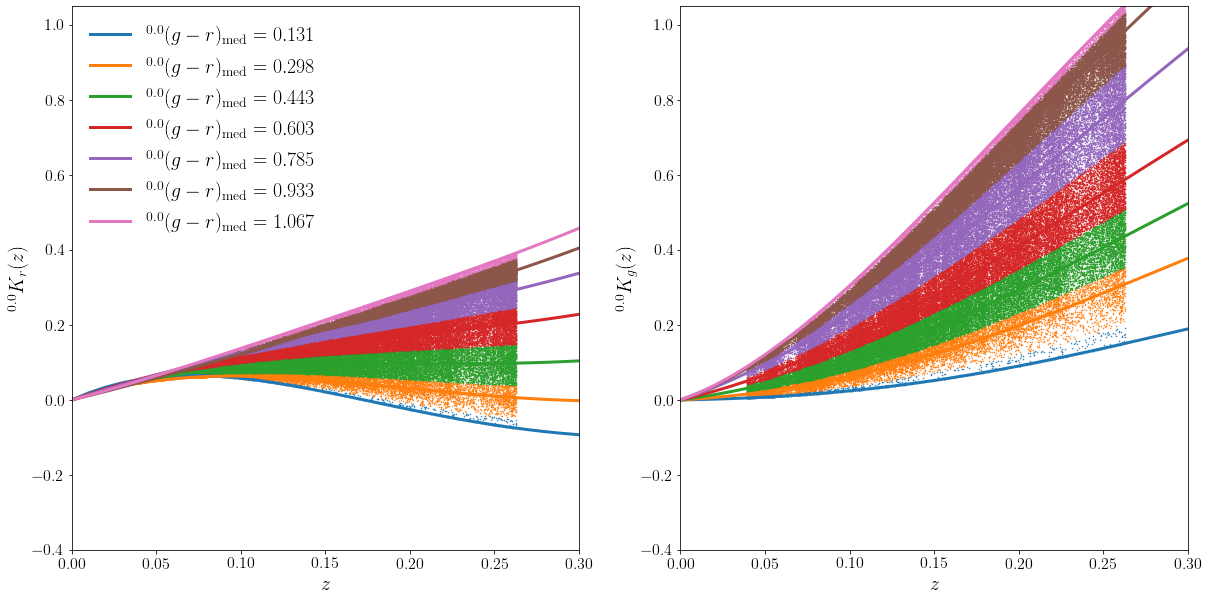

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)

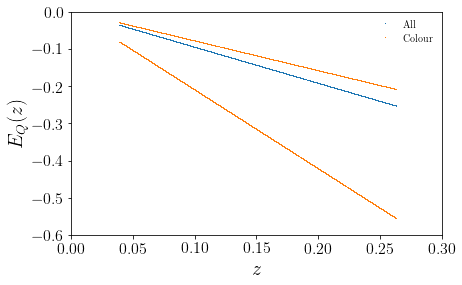

In [12]:
pl.plot(kE['ZSURV'], kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(kE['ZSURV'], kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Colour')

pl.xlabel(r'$z$')
pl.ylabel(r'$E_Q(z)$')

pl.xlim(0.0,0.3)
pl.ylim(-0.6, 0.0)

pl.legend(frameon=False)

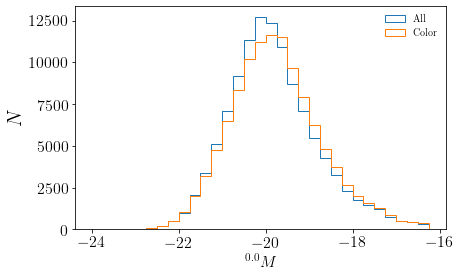

In [13]:
_ = pl.hist(kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)
pl.ylabel('$N$')

pl.legend(frameon=False)

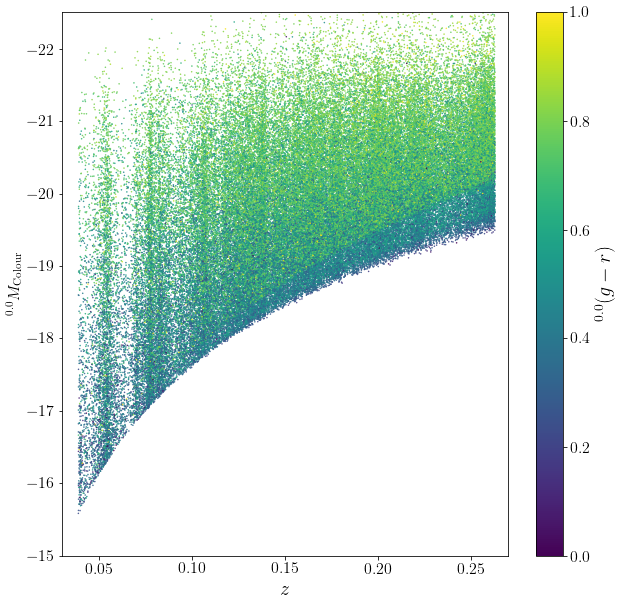

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

pl.sca(ax)

plt.scatter(kE['ZSURV'], kE['MCOLOR_0P0'], c=kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$z$')
plt.ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)

plt.colorbar(label = r'$^{0.0}(g-r)$')

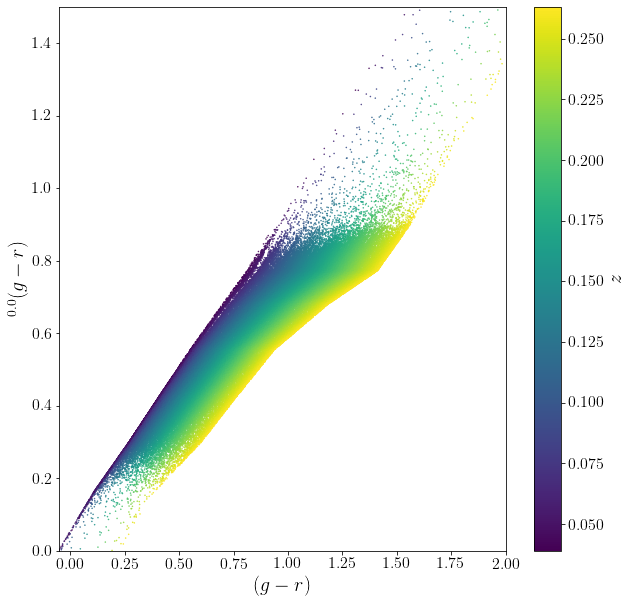

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(kE['GMR'], kE['REST_GMR_0P0'], c=kE['ZSURV'], s=0.25)
plt.xlabel(r'$(g-r)$')
plt.ylabel(r'$^{0.0}(g-r)$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='$z$')

# Done.